In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import get_cmap
from collections import Counter
import matplotlib.colors as mcolors

### Pairwise agreement between indicators

In [ ]:
Correlation_general=pd.read_csv("path/correlation_matrix_Geral.csv", index_col=0)

In [14]:
# Define the discrete color scale and boundaries
cmap = get_cmap('Greys', 6).reversed()  # Discrete colormap with 6 colors
bounds = [0, 20, 40, 60, 80, 100]  # Define the boundaries for the color ranges
norm = BoundaryNorm(bounds, cmap.N)

C:\Users\gqg5266\AppData\Local\Temp\ipykernel_24592\1005917890.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Greys', 6).reversed()  # Discrete colormap with 6 colors


In [15]:
# List of methods to be plotted
methods = [
    "Alencar et al.",
    "Noguera et al.",
    "Osman et al.",
    "Ford and Labosier",     
    "Pendergrass et al.",
    "Christian et al.",
]

# Unique color to each method
colors = ["#48787E", "#B1B455", "#658859", "#658859", "#3D5142", "#3D5142"]

# Custom colors for specific y-axis labels
y_label_colors = {
    "Alencar et al.": "#48787E",
    "Noguera et al.": "#B1B455",
    "Osman et al.": "#658859",
    "Ford and Labosier": "#658859",
    "Pendergrass et al.": "#3D5142",
    "Christian et al.": "#3D5142"
}

In [16]:
# Function to calculate luminance of a color (to determine if it's light or dark)
def get_text_color_from_luminance(rgb_color):
    r, g, b = rgb_color[:3]
    # Calculate luminance (weighted sum of RGB values based on human perception)
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    # If luminance is greater than a threshold, use black text, otherwise use white
    return 'black' if luminance > 0.5 else 'white'

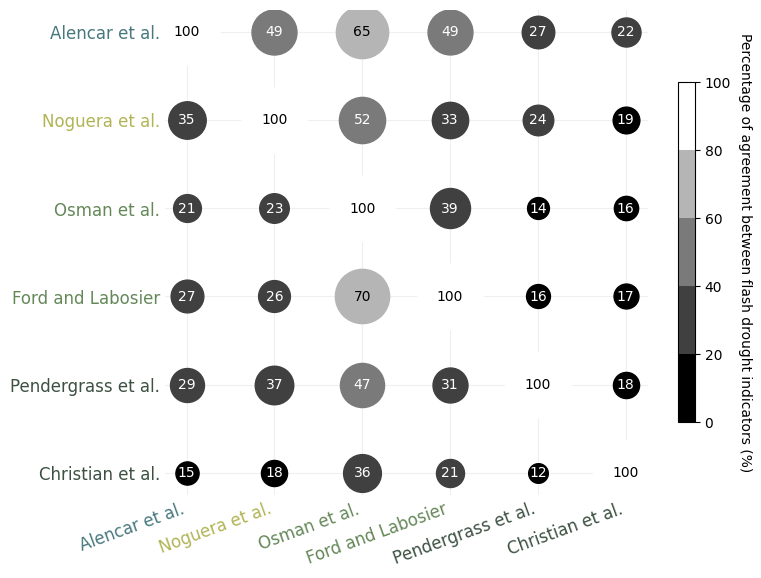

In [34]:
# Create a matrix diagram with circles
fig, ax = plt.subplots(figsize=(8,6))

# Create a grid of coordinates for the matrix
x, y = np.meshgrid(np.arange(Correlation_general.shape[1]), np.arange(Correlation_general.shape[0]))

# Normalize the matrix values to be used as circle sizes
min_size = 200  # Minimum circle size
max_size = 2200  # Maximum circle size
matrix_values = Correlation_general.values
circle_sizes = np.interp(matrix_values, (matrix_values.min(), matrix_values.max()), (min_size, max_size))

# Scatter the circles with sizes proportional to agreement and colors representing percentages
for i in range(Correlation_general.shape[0]):
    for j in range(Correlation_general.shape[1]):
        # Get the color of the circle
        circle_color = cmap(norm(matrix_values[i, j]))
        
        # Scatter the circle
        ax.scatter(j, i, s=circle_sizes[i, j], c=matrix_values[i, j], cmap=cmap, norm=norm,)
        
        # Determine text color based on luminance
        text_color = get_text_color_from_luminance(circle_color)

        # Add annotations (percentage) inside the circles with appropriate text color
        ax.text(j, i, f'{matrix_values[i, j]:.0f}', color=text_color, ha='center', va='center', fontsize=10)

# Set x and y axis labels with methods and colors
ax.set_xticks(np.arange(len(methods)))
ax.set_xticklabels(methods, rotation=20, ha='right', fontsize=12)

ax.set_yticks(np.arange(len(methods)))
ax.set_yticklabels(methods, rotation=0, fontsize=12)

# Applying custom colors to y-axis labels
for tick_label in ax.get_yticklabels():
    text = tick_label.get_text()
    tick_label.set_color(y_label_colors.get(text, "black"))

# Applying custom colors to x-axis labels
for tick_label in ax.get_xticklabels():
    text = tick_label.get_text()
    tick_label.set_color(y_label_colors.get(text, "black"))

# Remove tick marks while keeping the axis labels
ax.tick_params(axis='both', which='both', length=0)  # This removes the tick marks

# Title and layout adjustments
ax.invert_yaxis()  # To have the origin at the top-left corner

 # Remove all spines
ax.set_frame_on(False)

# Set grid lines with some transparency
ax.grid(alpha=0.2)

 # Make sure grid lines are behind other objects
ax.set_axisbelow(True)

# Add colorbar to indicate the percentage/color mapping
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, ticks=bounds, orientation='vertical', shrink=0.7,)
cbar.set_label('Percentage of agreement between flash drought indicators (%)', rotation=270, labelpad=15)

plt.tight_layout(pad=1.5) 
# Save the plot as an image file

#plot_file = 'C:/Users/gqg5266/OneDrive - The Pennsylvania State University/PennState/FlashDrought_main/Flash_Dr_CONUS/FDagreement_v3/correlation_plot_circles_v2.png'
#plt.savefig(plot_file, bbox_inches='tight', dpi=300)
plt.show()


### Event-level multi-indicator agreements

In [ ]:
df= pd.read_csv('path/huc4_event_summary_by_method_threshold.csv')

In [41]:
method_rename = {
    'event_1_methods': '1',
    'event_2_methods': '2',
    'event_3_methods': '3',
    'event_4_methods': '4',
    'event_5_methods': '5',
    'event_6_methods': '6'
}

In [42]:
method_colors = {
    method_rename['event_1_methods']: '#F7A63B',  
    method_rename['event_2_methods']: '#F48C06',         
    method_rename['event_3_methods']: '#E85D04',    
    method_rename['event_4_methods']: '#CC0000', 
    method_rename['event_5_methods']: '#9D0208',
    method_rename['event_6_methods']: '#6A040F' 
}

In [47]:
df['event_type'] = df['event_type'].replace(method_rename)

In [48]:
# Set the order of the event types (methods) in the plot based on your preference
methods_order = list(method_colors.keys())

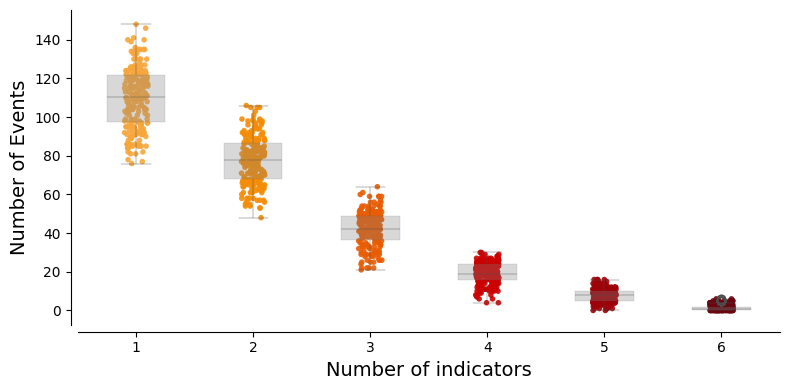

In [ ]:
# Create the plot figure
plt.figure(figsize=(8, 4))

# Add jitter using stripplot in the background (set zorder lower than boxplot)
sns.stripplot(
    x='event_type',
    y='number_of_events',
    hue='event_type',
    data=df,
    jitter=True,
    palette=method_colors,
    size=4,
    alpha=0.9,
    zorder=1,
    legend=False
)

# Create the boxplot with gray boxes and some transparency
sns.boxplot(x='event_type', y='number_of_events', data=df, color='gray', linewidth=0.3, 
            width=0.5, boxprops=dict(alpha=0.3), zorder=2)

# Customize the plot
plt.ylabel("Number of Events", fontsize=14)
plt.xlabel("Number of indicators", fontsize=14)
plt.xticks(rotation=45)

# Remove the y-axis gridlines
plt.grid(False)

# Remove spines for a cleaner look
sns.despine(offset=5, trim=False)

# Tight layout for spacing
plt.tight_layout()

# Show the plot
plt.show()

#save the plot
figures_directory="path"
output_file = os.path.join(figures_directory, 'number_of_events_boxplot.png')
plt.savefig(output_file, dpi=300)